In [2]:
import pandas as pd
import math
df = pd.read_csv("Churn_Modelling.csv")
import numpy as np

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.columns
#note this : The columns 'rownumber,customer id,surname' are the ones not important

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df['Geography'].value_counts()
#So we get that there are people only from 3 countries
# So France-1 , Germany-2 , Spain-3 ... 
#Doubt : Is this one hot encoding

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [7]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [8]:
import math
import matplotlib.pyplot as plt

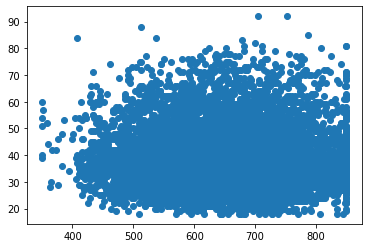

In [9]:
plt.scatter(df['CreditScore'],df['Age'])



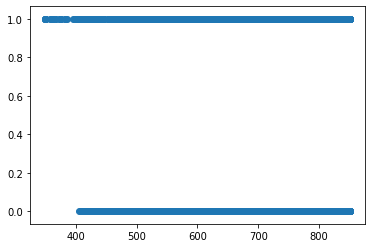

In [10]:
plt.scatter(df['CreditScore'],df['Exited'])

#So if credit score below 400 then they exit

In [11]:
# for i in df[['Geography']]:
#     if i == 'France':
#         df.loc[i,'Geography'] = 1
#     elif i == 'Germany':
#         df.loc[i,'Geography'] = 2
#     elif i == 'Spain':
#         df.loc[i,'Geography'] = 3
        
        
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['France', 'Germany', 'Spain'])
df['Geo_Num'] = le.transform(df[['Geography']])

le = preprocessing.LabelEncoder()
le.fit(['Female', 'Male'])
df['Gender_Num'] = le.transform(df[['Gender']])

/Users/phalgunvyas/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_Num,Gender_Num
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,2,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,2,0


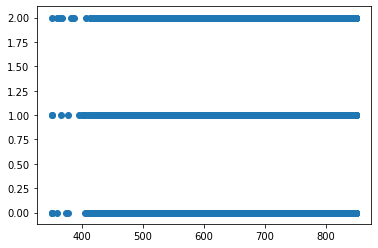

In [13]:
plt.scatter(df['CreditScore'],df['Geo_Num'])

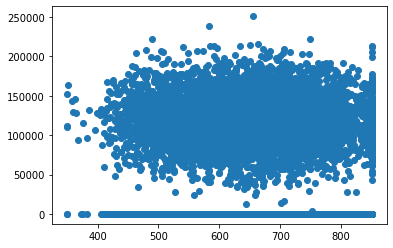

In [14]:
plt.scatter(df['CreditScore'],df['Balance'])

In [15]:
c = 0
HCC = 0
for i in range(df['Balance'].shape[0]):
    if df['IsActiveMember'][i]==0:
        HCC = HCC +1
        if df['Exited'][i]==1:
            c=c+1
print(c,HCC)
#People having Credit Card = 7055 ... out of those exited are 1424
#People not having CC = 2945 ... out of those exited are 613
#Non active members are 4849 ... exited are 1302 out of them

1302 4849


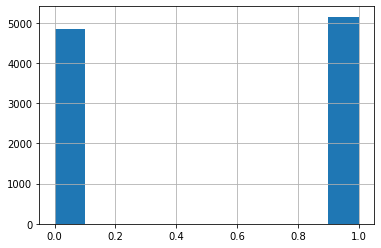

In [16]:
df['IsActiveMember'].hist()

In [17]:
df.corr()['Exited'].sort_values(ascending=False)
# we can conclude that age,balance,isactivemember,gendernum are most correlated
# chi value and p value... do those matter

Exited             1.000000
Age                0.285323
Balance            0.118533
Geo_Num            0.035943
EstimatedSalary    0.012097
CustomerId        -0.006248
HasCrCard         -0.007138
Tenure            -0.014001
RowNumber         -0.016571
CreditScore       -0.027094
NumOfProducts     -0.047820
Gender_Num        -0.106512
IsActiveMember    -0.156128
Name: Exited, dtype: float64

In [18]:
# df.drop('CustomerId','Surname','Geography','Gender','RowNumber') ... ask how to drop all together
del df['CustomerId']
del df['Surname']
del df['Geography']
del df['Gender']
del df['RowNumber']
del df['EstimatedSalary']
del df['HasCrCard']
del df['Tenure']


In [19]:
df.head()

,CreditScore,Age,Balance,NumOfProducts,IsActiveMember,Exited,Geo_Num,Gender_Num
0,619,42,0.00,1,1,1,0,0
1,608,41,83807.86,1,1,0,2,0
2,502,42,159660.80,3,0,1,0,0
3,699,39,0.00,2,0,0,0,0
4,850,43,125510.82,1,1,0,2,0


In [20]:
df = df[['CreditScore','Age','Balance','NumOfProducts','IsActiveMember','Gender_Num','Geo_Num','Exited']]

In [21]:
normalized_df=(df-df.mean())/df.std()

In [22]:
normalized_df.head()

,CreditScore,Age,Balance,NumOfProducts,IsActiveMember,Gender_Num,Geo_Num,Exited
0,-0.326205,0.293503,-1.225786,-0.911538,0.970194,-1.095933,-0.901841,1.977066
1,-0.440014,0.198154,0.117344,-0.911538,0.970194,-1.095933,1.514992,-0.505749
2,-1.536717,0.293503,1.332987,2.526930,-1.030619,-1.095933,-0.901841,1.977066
3,0.501496,0.007456,-1.225786,0.807696,-1.030619,-1.095933,-0.901841,-0.505749
4,2.063781,0.388852,0.785689,-0.911538,0.970194,-1.095933,1.514992,-0.505749


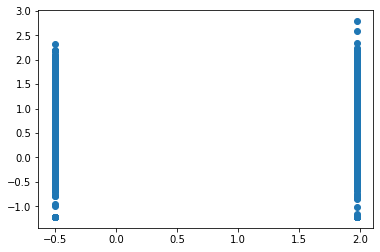

In [23]:
plt.scatter(normalized_df['Exited'],normalized_df['Balance'])

In [24]:
c = 0
HCC = 0
for i in range(df['Balance'].shape[0]):
    if df['IsActiveMember'][i]==0 :
        HCC = HCC +1
        if df['Exited'][i]==1:
            c=c+1
print(c,HCC)
# Doesn't have CC and no active 1401 ... out of that exited 360


1302 4849


Let us apply models now
The types of model to be applied are:
1) Logistic Regression, 
2) Support Vector Classifier, 
3) Random Forest Classifier, 
4) Gradient Boosting Classifier, 
5) Xtreme Gradient Boosting Classifier, and 
6) Light Gradient Boosting Machine.

In [26]:
# Dividing sets into parts:
X=df.iloc[:,:-2]
Y=df.iloc[:,-2:-1]
from sklearn.model_selection import\
train_test_split
Split Training and Testing Data
X_train,X_test,Y_train,Y_test = \
train_test_split(X,Y,test_size = 0.25,\
                 random_state=1)

SyntaxError: invalid syntax (<ipython-input-26-e3836c6ceabf>, line 6)

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

In [35]:
#1. Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train,Y_train)
Y_pred=clf.predict(X_test)

from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error( Y_test, Y_pred ))



/Users/phalgunvyas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/phalgunvyas/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/phalgunvyas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.6083872623587613

In [37]:
#SVC
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, Y_train)
Y_pred=clf.predict(X_test)
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error( Y_test, Y_pred ))



/Users/phalgunvyas/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5939568259972794

In [38]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, Y_train)
Y_pred=clf.predict(X_test)
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error( Y_test, Y_pred ))



/Users/phalgunvyas/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/phalgunvyas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.6463061333855489

In [40]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, Y_train)
Y_pred=clf.predict(X_test)
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error( Y_test, Y_pred ))

/Users/phalgunvyas/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5927445711904121

In [1]:
# #Kfold
# from sklearn.model_selection import KFold
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import mean_squared_log_error
# kf = KFold(n_splits=10)

# for train_index, test_index in kf.split(X):
# #     print("TRAIN:", train_index, "TEST:", test_index)
#     X_train, X_test = X[train_index], X[test_index]
#     Y_train, Y_test = Y[train_index], Y[test_index]
    
#     clf = LogisticRegression(random_state=0).fit(X_train,Y_train)
#     Y_pred=clf.predict(X_test)
#     np.sqrt(mean_squared_log_error( Y_test, Y_pred ))



In [ ]:
def Classify(X_train, X_test,Y_train, Y_test):
    
    
def Logi(X_train, X_test,Y_train, Y_test):
#1. Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train,Y_train)
Y_pred=clf.predict(X_test)

from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error( Y_test, Y_pred ))


